# Phân loại bệnh tiểu đường (Pima Indians Diabetes)

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
image1 = Image.open("td.jpg");

## 1. Định nghĩa vấn đề (Define Problem)

+ **Mô tả**:
    + Bộ dữ liệu Pima Indians Diabetes chứa thông tin về các chỉ số y tế của phụ nữ da đỏ Pima, nhằm dự đoán xem họ **có bị bệnh tiểu đường hay không**.
    + Đây là bài toán **phân loại nhị phân (binary classification)** — đầu ra gồm hai lớp:  
      - 1: Bị tiểu đường  
      - 0: Không bị tiểu đường  
      
+ **Số thuộc tính (features)**: 8  
+ **Biến mục tiêu (Target)**: `Outcome`

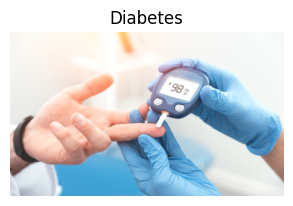

In [6]:
plt.figure(figsize=(12,12));
plt.subplot(1,3,1), plt.imshow(image1.resize((500,300))), plt.axis("off"), plt.title("Diabetes");
plt.show()

## 2. Chuẩn bị vấn đề (Prepare Problem)

### Khai báo thư viện (Load Libraries)

In [7]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### Tham số chương trình

In [8]:
# params
seed = 42  # random seed để tái dựng lại thực nghiệm giống nhau

exps_dir = "../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)

### Tải dữ liệu (Load Dataset)

In [10]:
# Load dataset
data_path  = "../data/pima-indians-diabetes.csv"
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
              "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df_org     = pd.read_csv(data_path, names = data_names)
display.display(df_org.head())
display.display(df_org.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Chia dữ liệu thực nghiệm

+ Dữ liệu ban đầu: chia 30% dữ liệu dùng để Test, 70% dùng để train
+ Dữ liệu train: chia chiến lược K-Fold với k = 5

In [12]:
index_all = np.arange(150)
index_train, index_test = train_test_split(index_all, test_size = 0.33, random_state=seed)

In [13]:
df_train = df_org.iloc[index_train]
df_test  = df_org.iloc[index_test]
print(f'train: {len(df_train)} / test: {len(df_test)} - Tỷ lệ: {len(df_train) / len(df_org)}, {len(df_test) / len(df_org)}')

train: 100 / test: 50 - Tỷ lệ: 0.13020833333333334, 0.06510416666666667


In [15]:
# Lưu dữ liệu sau khi chia
df_train.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
df_test.to_excel(f'{exps_dir}/data/test.xlsx', index=None)
np.savez(f'{exps_dir}/data/idx.npz', id_train = index_train, id_test = index_test)

In [16]:
# Kiểm tra lại
dict(np.load(f'{exps_dir}/data/idx.npz'))

{'id_train': array([ 96, 105,  66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,
         23,  94,  39,  95, 117,  47,  97, 113,  33, 138, 101,  62,  84,
        148,  53,   5,  93, 111,  49,  35,  80,  77,  34, 114,   7,  43,
         70,  98, 120,  83, 134, 135,  89,   8,  13, 119, 125,   3,  17,
         38,  72, 136,   6, 112, 100,   2,  63,  54, 126,  50, 115,  46,
        139,  61, 147,  79,  59,  91,  41,  58,  90,  48,  88, 107, 124,
         21,  57, 144, 129,  37, 140,   1,  52, 130, 103,  99, 116,  87,
         74, 121, 149,  20,  71, 106,  14,  92, 102]),
 'id_test': array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
          9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
        108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
         32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109])}

In [17]:
pd.read_excel(f'{exps_dir}/data/train.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,92,62,28,0,31.6,0.130,24,0
1,1,126,56,29,152,28.7,0.801,21,0
2,0,109,88,30,0,32.5,0.855,38,1
3,6,148,72,35,0,33.6,0.627,50,1
4,2,107,74,30,100,33.6,0.404,23,0
...,...,...,...,...,...,...,...,...,...
95,5,139,64,35,140,28.6,0.411,26,0
96,1,96,122,0,0,22.4,0.207,27,0
97,5,166,72,19,175,25.8,0.587,51,1
98,7,81,78,40,48,46.7,0.261,42,0


In [18]:
pd.read_excel(f'{exps_dir}/data/test.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,129,86,20,270,35.1,0.231,23,0
1,1,103,30,38,83,43.3,0.183,33,0
2,4,97,60,23,0,28.2,0.443,22,0
3,0,131,0,0,0,43.2,0.270,26,1
4,7,62,78,0,0,32.6,0.391,41,0
5,3,158,76,36,245,31.6,0.851,28,1
6,7,114,66,0,0,32.8,0.258,42,1
7,5,106,82,30,0,39.5,0.286,38,0
8,1,95,66,13,38,19.6,0.334,25,0
9,7,83,78,26,71,29.3,0.767,36,0


## 4. Tiền xử lý dữ liệu (Data Preprocessing)

### Làm sạch dữ liệu (Data Cleaning)

#### Tạo bảng dữ liệu làm sạch
+ Chỉ giữ lại các cột Input, Ouput

In [19]:
df_train = pd.read_excel(f'{exps_dir}/data/train.xlsx')

#### Xóa dữ liệu trùng nhau

In [20]:
display.display(df_train[df_train.duplicated(keep = False)])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [21]:
df_train.drop_duplicates(ignore_index=True, inplace=True)
display.display(df_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,92,62,28,0,31.6,0.130,24,0
1,1,126,56,29,152,28.7,0.801,21,0
2,0,109,88,30,0,32.5,0.855,38,1
3,6,148,72,35,0,33.6,0.627,50,1
4,2,107,74,30,100,33.6,0.404,23,0
...,...,...,...,...,...,...,...,...,...
95,5,139,64,35,140,28.6,0.411,26,0
96,1,96,122,0,0,22.4,0.207,27,0
97,5,166,72,19,175,25.8,0.587,51,1
98,7,81,78,40,48,46.7,0.261,42,0


#### Xử lý giá trị rỗng, không hợp lệ

In [22]:
# + Xóa bỏ cột vi phạm
# df_train.drop("cột_vi_phạm", axis=1)

# + Xóa bỏ các dòng vi phạm
# df_train.dropna(subset=["cột_vi_phạm", ...])

# + Điền giá trị mặc định:
# median = df_train["cột_vi_phạm"].median()
# df_train["cột_vi_phạm"].fillna(median, inplace=True)

In [23]:
print("="*5, "Null Value", "="*5)
display.display(df_train.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display.display(df_train.isna().sum())

===== Null Value =====


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

===== Checking NaN =====


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Biến đổi dữ liệu (Data Transforms)

#### Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [24]:
# Class: LabelEncoder
class_encoder = LabelEncoder()
class_encoder.fit(df_train["Outcome"])
class_names = class_encoder.classes_
print(class_names)

# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

# Load and check again
print(joblib.load(f'{save_dir}/class_encoder.joblib').classes_)

[0 1]
[0 1]


In [25]:
class_encoder.transform(df_train["Outcome"])

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [26]:
df_train["Outcome"] = class_encoder.transform(df_train["Outcome"])
display.display(df_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,92,62,28,0,31.6,0.130,24,0
1,1,126,56,29,152,28.7,0.801,21,0
2,0,109,88,30,0,32.5,0.855,38,1
3,6,148,72,35,0,33.6,0.627,50,1
4,2,107,74,30,100,33.6,0.404,23,0
...,...,...,...,...,...,...,...,...,...
95,5,139,64,35,140,28.6,0.411,26,0
96,1,96,122,0,0,22.4,0.207,27,0
97,5,166,72,19,175,25.8,0.587,51,1
98,7,81,78,40,48,46.7,0.261,42,0


#### Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

In [31]:
print("class_names: ", class_names)
df_onehot = pd.get_dummies(df_train["Outcome"])
df_onehot = pd.DataFrame(df_onehot.values, columns=class_names)
display.display(df_onehot)

class_names:  [0 1]


,0,1
0,True,False
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
95,True,False
96,True,False
97,False,True
98,True,False


#### Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

##### Min-Max Normalization

In [33]:
# Min-Max Normalization
scale_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_train[scale_columns])
df_minmax = df_train.copy()
df_minmax[scale_columns] = minmax_scaler.transform(df_train[scale_columns])
display.display(df_minmax)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.133333,0.313725,0.508197,0.466667,0.000000,0.574545,0.026533,0.062500,0
1,0.066667,0.535948,0.459016,0.483333,0.179669,0.521818,0.422170,0.000000,0
2,0.000000,0.424837,0.721311,0.500000,0.000000,0.590909,0.454009,0.354167,1
3,0.400000,0.679739,0.590164,0.583333,0.000000,0.610909,0.319575,0.604167,1
4,0.133333,0.411765,0.606557,0.500000,0.118203,0.610909,0.188090,0.041667,0
...,...,...,...,...,...,...,...,...,...
95,0.333333,0.620915,0.524590,0.583333,0.165485,0.520000,0.192217,0.104167,0
96,0.066667,0.339869,1.000000,0.000000,0.000000,0.407273,0.071934,0.125000,0
97,0.333333,0.797386,0.590164,0.316667,0.206856,0.469091,0.295991,0.625000,1
98,0.466667,0.241830,0.639344,0.666667,0.056738,0.849091,0.103774,0.437500,0


In [34]:
minmax_scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object),
 'n_features_in_': 8,
 'n_samples_seen_': 100,
 'scale_': array([0.06666667, 0.00653595, 0.00819672, 0.01666667, 0.00118203,
        0.01818182, 0.58962264, 0.02083333]),
 'min_': array([ 0.        , -0.2875817 ,  0.        ,  0.        ,  0.        ,
         0.        , -0.05011792, -0.4375    ]),
 'data_min_': array([ 0.   , 44.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.085, 21.   ]),
 'data_max_': array([ 15.   , 197.   , 122.   ,  60.   , 846.   ,  55.   ,   1.781,
         69.   ]),
 'data_range_': array([ 15.   , 153.   , 122.   ,  60.   , 846.   ,  55.   ,   1.696,
         48.   ])}

In [35]:
# Save encoders
joblib.dump(minmax_scaler, f'{save_dir}/minmax_scaler.joblib')

['../exps/feature1/minmax_scaler.joblib']

In [36]:
joblib.load(f'{save_dir}/minmax_scaler.joblib').__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object),
 'n_features_in_': 8,
 'n_samples_seen_': 100,
 'scale_': array([0.06666667, 0.00653595, 0.00819672, 0.01666667, 0.00118203,
        0.01818182, 0.58962264, 0.02083333]),
 'min_': array([ 0.        , -0.2875817 ,  0.        ,  0.        ,  0.        ,
         0.        , -0.05011792, -0.4375    ]),
 'data_min_': array([ 0.   , 44.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.085, 21.   ]),
 'data_max_': array([ 15.   , 197.   , 122.   ,  60.   , 846.   ,  55.   ,   1.781,
         69.   ]),
 'data_range_': array([ 15.   , 153.   , 122.   ,  60.   , 846.   ,  55.   ,   1.696,
         48.   ])}

In [37]:
# save scale_columns
np.savez(f'{save_dir}/scale_columns.npz', scale_columns = scale_columns)
dict(np.load(f'{save_dir}/scale_columns.npz'))

{'scale_columns': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='<U24')}

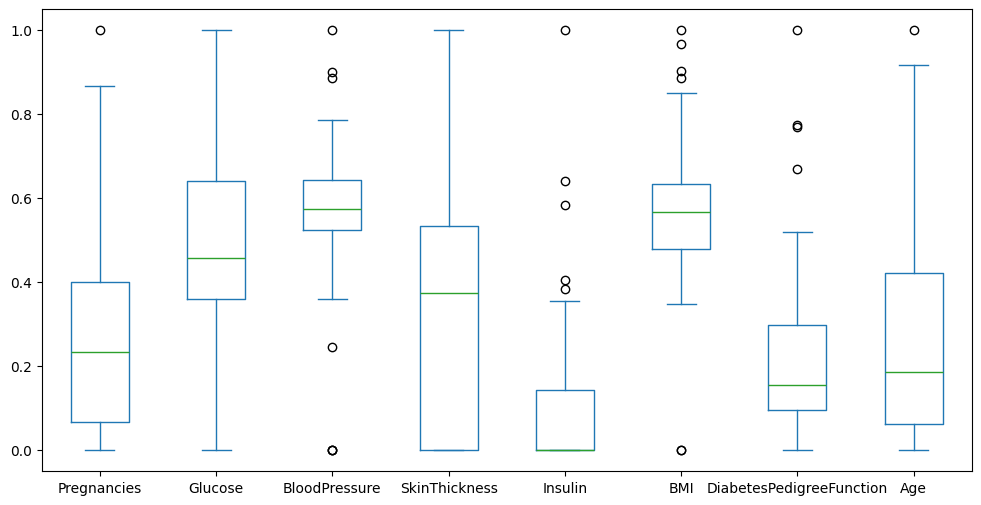

In [38]:
df_minmax[scale_columns].plot(kind="box", figsize=(12,6));

##### Standard Normalization

In [39]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_train[scale_columns])
df_standard = df_train.copy()
df_standard[scale_columns] = standard_scaler.transform(df_train[scale_columns])
display.display(df_standard)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.609618,-0.914626,-0.427384,0.507966,-0.620088,0.038716,-1.064968,-0.806085,0
1,-0.911410,0.221555,-0.754047,0.569838,0.538670,-0.297443,1.178372,-1.047910,0
2,-1.213201,-0.346535,0.988155,0.631710,-0.620088,0.143042,1.358909,0.322434,1
3,0.597547,0.956732,0.117054,0.941068,-0.620088,0.270550,0.596641,1.289736,1
4,-0.609618,-0.413370,0.225942,0.631710,0.142253,0.270550,-0.148910,-0.886693,0
...,...,...,...,...,...,...,...,...,...
95,0.295755,0.655978,-0.318496,0.941068,0.447189,-0.309035,-0.125507,-0.644868,0
96,-0.911410,-0.780958,2.839244,-1.224440,-0.620088,-1.027721,-0.807535,-0.564259,0
97,0.295755,1.558240,0.117054,-0.048879,0.714009,-0.633603,0.462910,1.370344,1
98,0.899338,-1.282214,0.443717,1.250427,-0.254165,1.789064,-0.626998,0.644868,0


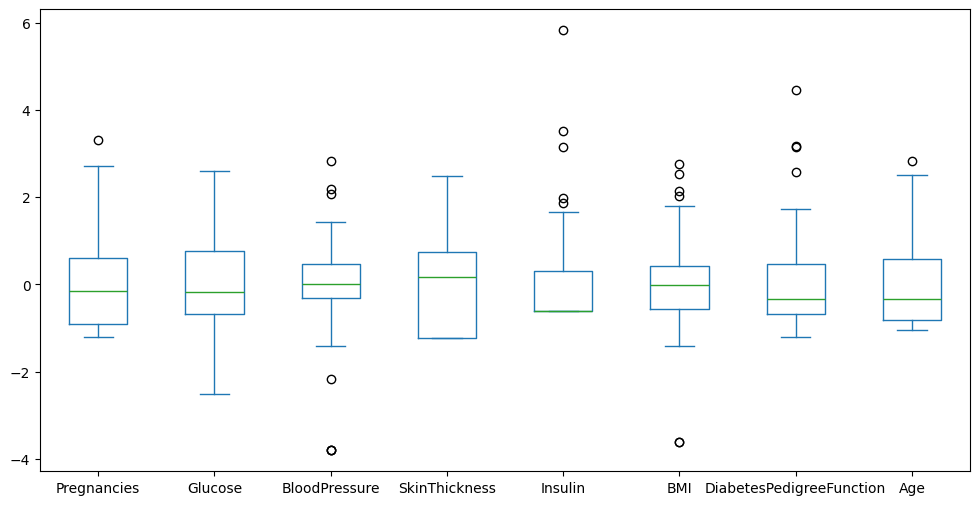

In [40]:
df_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [41]:
correlations = df_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.232990,0.027653,-0.041934,0.031964,0.058340,-0.176611,0.415018,0.269613
Glucose,0.232990,1.000000,0.186385,0.015109,0.474505,0.158518,0.110289,0.463236,0.377704
BloodPressure,0.027653,0.186385,1.000000,0.012357,-0.002598,0.375230,0.132331,0.342094,0.182855
SkinThickness,-0.041934,0.015109,0.012357,1.000000,0.430440,0.407217,0.115144,-0.111518,0.122957
Insulin,0.031964,0.474505,-0.002598,0.430440,1.000000,0.164990,0.047851,0.258064,0.217488
BMI,0.058340,0.158518,0.375230,0.407217,0.164990,1.000000,0.230575,0.164471,0.325100
DiabetesPedigreeFunction,-0.176611,0.110289,0.132331,0.115144,0.047851,0.230575,1.000000,0.168220,0.127718
Age,0.415018,0.463236,0.342094,-0.111518,0.258064,0.164471,0.168220,1.000000,0.413500
Outcome,0.269613,0.377704,0.182855,0.122957,0.217488,0.325100,0.127718,0.413500,1.000000


In [42]:
standard_scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object),
 'n_features_in_': 8,
 'n_samples_seen_': np.int64(100),
 'mean_': array([  4.02   , 119.37   ,  69.85   ,  19.79   ,  81.34   ,  31.266  ,
          0.44854,  34.     ]),
 'var_': array([1.09796000e+01, 8.95493100e+02, 3.37367500e+02, 2.61225900e+02,
        1.72068444e+04, 7.44226440e+01, 8.94653684e-02, 1.53900000e+02]),
 'scale_': array([  3.31354795,  29.92479073,  18.36756652,  16.16248434,
        131.17486192,   8.62685597,   0.29910762,  12.40564388])}

In [43]:
# Save encoders
joblib.dump(standard_scaler, f'{save_dir}/standard_scaler.joblib')

['../exps/feature1/standard_scaler.joblib']

In [44]:
joblib.load(f'{save_dir}/standard_scaler.joblib').__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object),
 'n_features_in_': 8,
 'n_samples_seen_': np.int64(100),
 'mean_': array([  4.02   , 119.37   ,  69.85   ,  19.79   ,  81.34   ,  31.266  ,
          0.44854,  34.     ]),
 'var_': array([1.09796000e+01, 8.95493100e+02, 3.37367500e+02, 2.61225900e+02,
        1.72068444e+04, 7.44226440e+01, 8.94653684e-02, 1.53900000e+02]),
 'scale_': array([  3.31354795,  29.92479073,  18.36756652,  16.16248434,
        131.17486192,   8.62685597,   0.29910762,  12.40564388])}

### Lưu dữ liệu Features

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [46]:
# MinMax
x_train = df_minmax.values[:, :-1]
y_train = df_minmax.values[:, -1]
display.display(df_minmax.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_minmax.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_minmax.xlsx', index=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.133333,0.313725,0.508197,0.466667,0.000000,0.574545,0.026533,0.062500,0
1,0.066667,0.535948,0.459016,0.483333,0.179669,0.521818,0.422170,0.000000,0
2,0.000000,0.424837,0.721311,0.500000,0.000000,0.590909,0.454009,0.354167,1
3,0.400000,0.679739,0.590164,0.583333,0.000000,0.610909,0.319575,0.604167,1
4,0.133333,0.411765,0.606557,0.500000,0.118203,0.610909,0.188090,0.041667,0


+ x_train: 
  [[0.13333333 0.31372549 0.50819672 0.46666667 0.         0.57454545
  0.02653302 0.0625    ]
 [0.06666667 0.53594771 0.45901639 0.48333333 0.17966903 0.52181818
  0.42216981 0.        ]
 [0.         0.4248366  0.72131148 0.5        0.         0.59090909
  0.45400943 0.35416667]
 [0.4        0.67973856 0.59016393 0.58333333 0.         0.61090909
  0.31957547 0.60416667]
 [0.13333333 0.41176471 0.60655738 0.5        0.11820331 0.61090909
  0.18808962 0.04166667]]
+ y_train: 
  [0. 0. 1. 1. 0.]


In [47]:
# MinMax
x_train = df_standard.values[:, :-1]
y_train = df_standard.values[:, -1]
display.display(df_standard.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_standard.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_standard.xlsx', index=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.609618,-0.914626,-0.427384,0.507966,-0.620088,0.038716,-1.064968,-0.806085,0
1,-0.911410,0.221555,-0.754047,0.569838,0.538670,-0.297443,1.178372,-1.047910,0
2,-1.213201,-0.346535,0.988155,0.631710,-0.620088,0.143042,1.358909,0.322434,1
3,0.597547,0.956732,0.117054,0.941068,-0.620088,0.270550,0.596641,1.289736,1
4,-0.609618,-0.413370,0.225942,0.631710,0.142253,0.270550,-0.148910,-0.886693,0


+ x_train: 
  [[-0.60961846 -0.91462628 -0.42738378  0.50796646 -0.62008832  0.03871631
  -1.06496785 -0.80608472]
 [-0.91140978  0.22155543 -0.75404654  0.56983814  0.53867028 -0.29744324
   1.17837185 -1.04791014]
 [-1.2132011  -0.34653542  0.98815485  0.63170982 -0.62008832  0.14304168
   1.35890888  0.32243389]
 [ 0.59754681  0.95673184  0.11705416  0.9410682  -0.62008832  0.27055048
   0.59664144  1.28973556]
 [-0.60961846 -0.41336964  0.22594174  0.63170982  0.14225287  0.27055048
  -0.14890961 -0.88669319]]
+ y_train: 
  [0. 0. 1. 1. 0.]


# Kết thúc

In [48]:
import os

cur_dir = os.getcwd() 

html_path = os.path.join(cur_dir, "preprocessing.html")
ipynb_path = os.path.join(cur_dir, "preprocessing.ipynb")

if os.path.exists(html_path):
    os.remove(html_path)

!jupyter nbconvert "{ipynb_path}" --to html

[NbConvertApp] Converting notebook D:\ai_pratice_prj\ex_pima_diabetes\preprocessing\preprocessing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 518302 bytes to D:\ai_pratice_prj\ex_pima_diabetes\preprocessing\preprocessing.html
